## Logistic Regression
-  https://www.andrewvillazon.com/logistic-regression-python-statsmodels/
-  https://www.javatpoint.com/logistic-regression-in-machine-learning
-  Predict a category (0/1, Yes/No) on the basis of IVs (which can be continous or categories)
-  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
-  Predict Y (Dependent Variable) on the basis of Xs (Independent Variables)
-  Y : Category Value (0 or 1)
-  Xs : can be continous or discrete eg. gender, age, salary, experience in yrs etc
-  In this mtcars data set : Y (am/ tx) predict on the basis of Xs (wt, hp, mpg)
-  Steps
    -  from sklearn.linear_model import LogisticRegression
    -  model = LogisticRegression().fit(X,y)
    -  r_sq = model.score(X, y)
    -  y_pred = model.predict(X)
    -  Y_pred(new) = model.predict(X new)
-  Two Libraries - sklearn and statsmodels
    -  logreg1 - sklearn
    -  logreg2 - statsmodel
-  Case Study
    -  https://www.kaggle.com/code/vyduong11/eda-logistic-regression-to-predict-attrition
    -  https://towardsdatascience.com/building-an-employee-churn-model-in-python-to-develop-a-strategic-retention-plan-57d5bd882c2d
    -  https://www.linkedin.com/pulse/predicting-employee-attrition-using-two-methods-tree-what-simon/
    -  Predict whether employee will leave or not (Attrition)

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import os

In [2]:
#options
# https://pandas.pydata.org/docs/user_guide/options.html
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
pd.set_option("expand_frame_repr", True)
pd.set_option("max_info_columns", 11)
pd.set_option("display.precision", 3)
pd.set_option('display.width', 1000)  #wrap with full display
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.listdir('../data/trg/')
#filePath = 'https://raw.githubusercontent.com/dupadhyaya/hrAnalytics/main/data/misc/HR_employeeAttrition.csv'

['amitMIS.xlsx',
 'empData1.csv',
 'hrAttrition.csv',
 'hris.xlsx',
 'hrTurnover.csv',
 'salaryDataset.csv']

In [4]:
#data
df = pd.read_csv('../data/trg/hrAttrition.csv')
print(df.shape, '\n', df.columns.tolist(),'\n')
print(df.dtypes, '\n', df.iloc[:,[0,1,2]].head())
#147- employees with 35 columns

(1470, 35) 
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'] 

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatis

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000,1470.000,1470.000,1470.000,1470.0,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.00,1470.000,1470.000,1470.0,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1.0,1024.865,2.722,65.891,2.730,2.064,2.729,6502.931,14313.103,2.693,15.21,3.154,2.712,80.0,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,0.0,602.024,1.093,20.329,0.712,1.107,1.103,4707.957,7117.786,2.498,3.66,0.361,1.081,0.0,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.0,1.000,1.000,30.000,1.000,1.000,1.000,1009.000,2094.000,0.000,11.00,3.000,1.000,80.0,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,1.0,491.250,2.000,48.000,2.000,1.000,2.000,2911.000,8047.000,1.000,12.00,3.000,2.000,80.0,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1.0,1020.500,3.000,66.000,3.000,2.000,3.000,4919.000,14235.500,2.000,14.00,3.000,3.000,80.0,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1.0,1555.750,4.000,83.750,3.000,3.000,4.000,8379.000,20461.500,4.000,18.00,3.000,4.000,80.0,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1499.000,29.000,5.000,1.0,2068.000,4.000,100.000,4.000,5.000,4.000,19999.000,26999.000,9.000,25.00,4.000,4.000,80.0,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

In [8]:
selCols = ['Attrition','Age','DistanceFromHome', 'Education','YearsAtCompany', 'JobSatisfaction']
df1=df[selCols].copy()
df1.head()

,Attrition,Age,DistanceFromHome,Education,YearsAtCompany,JobSatisfaction
0,Yes,41,1,2,6,4
1,No,49,8,1,10,2
2,Yes,37,2,2,0,3
3,No,33,3,4,8,3
4,No,27,2,1,2,2


In [9]:
df1.shape

(1470, 6)

(array([ 57., 105., 224., 265., 255., 217., 131.,  92.,  77.,  47.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

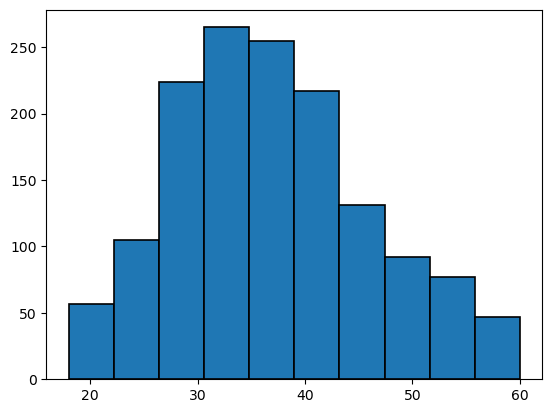

In [10]:
#df['Age'].hist(ylabelsize=10)
plt.hist(df1['Age'], edgecolor='black', linewidth=1.2)

In [11]:
df1['Attrition'].value_counts(normalize=True)  #normalize=True/False
#How many left

Attrition
No     0.839
Yes    0.161
Name: proportion, dtype: float64

<Axes: ylabel='count'>

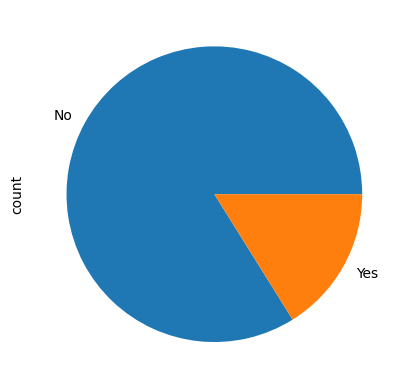

In [12]:
df1['Attrition'].value_counts().plot.pie()  #subplots=True

In [13]:
df1.columns.tolist()

['Attrition',
 'Age',
 'DistanceFromHome',
 'Education',
 'YearsAtCompany',
 'JobSatisfaction']

In [14]:
df1.dtypes

Attrition           object
Age                  int64
DistanceFromHome     int64
Education            int64
YearsAtCompany       int64
JobSatisfaction      int64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# for cat value , put number
#cal_cols = ['Attrition']
df1['Attrition'] = label_encoder.fit_transform(df1['Attrition'])
#for col in cat_cols:    df1[col] = label_encoder.fit_transform(df1[col])
df1.dtypes

Attrition           int32
Age                 int64
DistanceFromHome    int64
Education           int64
YearsAtCompany      int64
JobSatisfaction     int64
dtype: object

In [17]:
df1.head()

,Attrition,Age,DistanceFromHome,Education,YearsAtCompany,JobSatisfaction
0,1,41,1,2,6,4
1,0,49,8,1,10,2
2,1,37,2,2,0,3
3,0,33,3,4,8,3
4,0,27,2,1,2,2


In [18]:
df1['Attrition'].value_counts(normalize=True)

Attrition
0    0.839
1    0.161
Name: proportion, dtype: float64

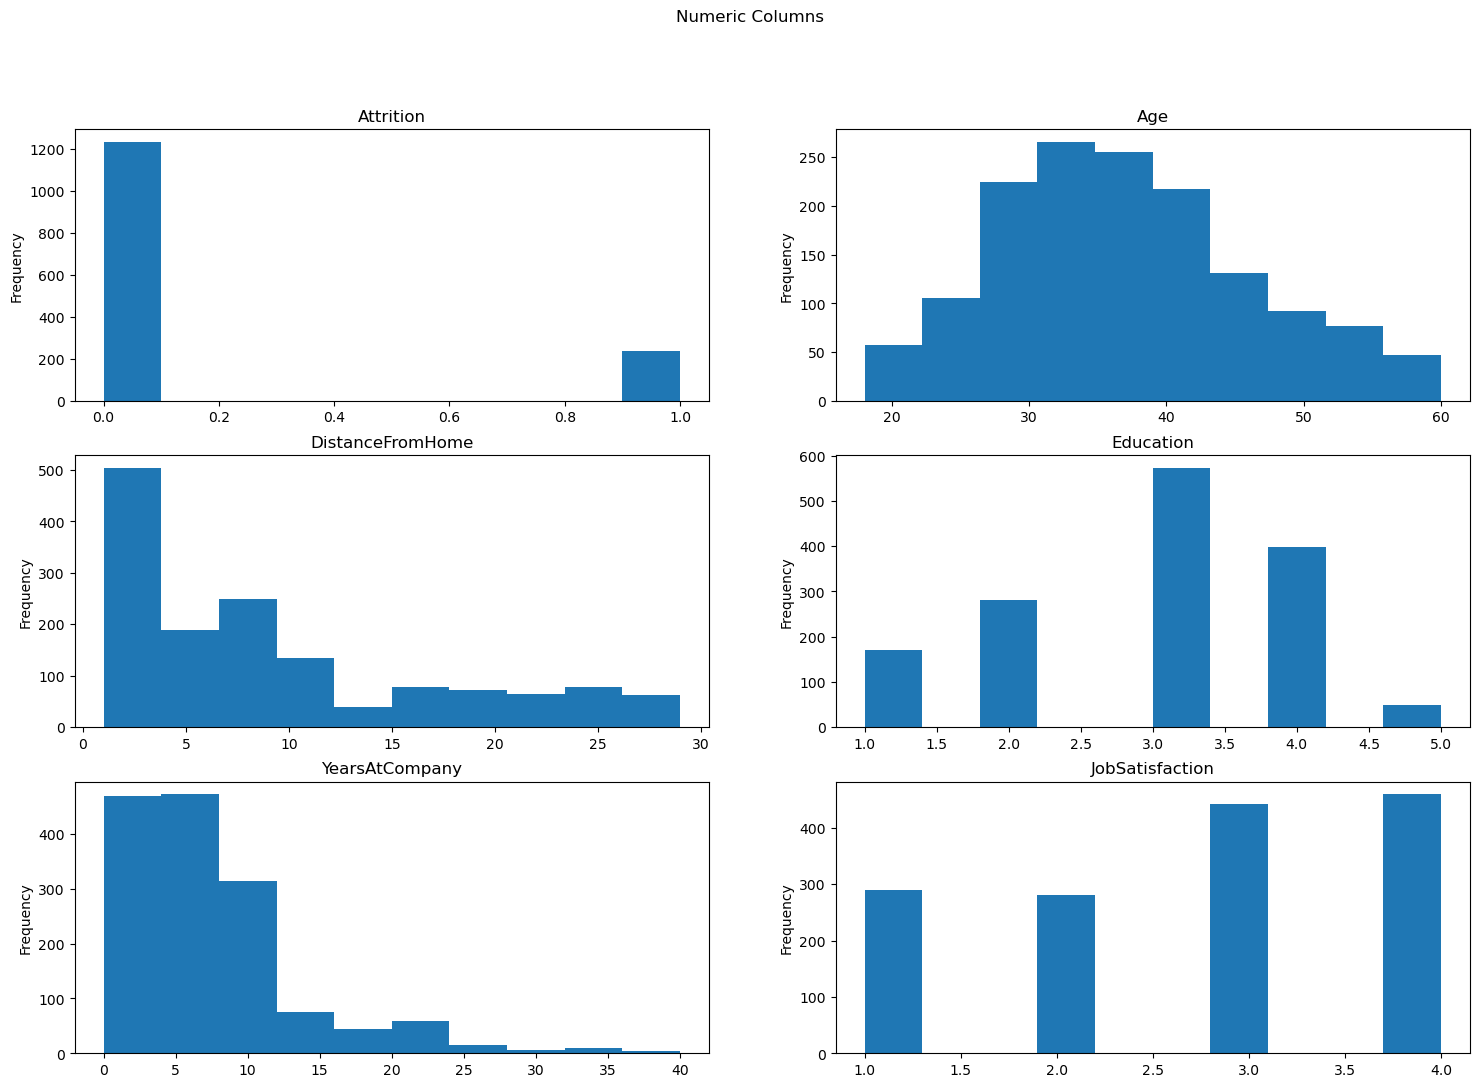

In [19]:
# assuming you have x  columns:
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
# use `select_dtypes` to filter instead of `describe` : O for object
fig.suptitle('Numeric Columns')
for col, ax in zip(df1.select_dtypes(include='number'), axes.ravel()):
    df1[col].plot.hist(ax=ax)
    ax.set_title(col)
plt.show()

In [20]:
#additional libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split  #split
import statsmodels.api as sm
#seaborn to create confusion matrix

In [21]:
df1.Attrition.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Attrition         1470 non-null   int32
 1   Age               1470 non-null   int64
 2   DistanceFromHome  1470 non-null   int64
 3   Education         1470 non-null   int64
 4   YearsAtCompany    1470 non-null   int64
 5   JobSatisfaction   1470 non-null   int64
dtypes: int32(1), int64(5)
memory usage: 63.3 KB


In [23]:
df2 = df1.copy()
X = df2.drop(columns='Attrition')
y = df2.Attrition
print(X.shape, y.shape)

(1470, 5) (1470,)


In [24]:
print(X.head(), '\n', y.head())

   Age  DistanceFromHome  Education  YearsAtCompany  JobSatisfaction
0   41                 1          2               6                4
1   49                 8          1              10                2
2   37                 2          2               0                3
3   33                 3          4               8                3
4   27                 2          1               2                2 
 0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 107, stratify=df2['Attrition'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1029, 5) (441, 5) (1029,) (441,)


In [26]:
#row = train + test rows  : 1029 + 441 = 1470
print(y_train.value_counts(normalize=False), ' Test ', y_test.value_counts(normalize=False))

Attrition
0    863
1    166
Name: count, dtype: int64  Test  Attrition
0    370
1     71
Name: count, dtype: int64


In [27]:
pd.concat([y_train.head(), X_train.head()], axis=1)

,Attrition,Age,DistanceFromHome,Education,YearsAtCompany,JobSatisfaction
633,0,36,8,3,5,1
205,1,29,27,3,10,4
727,0,18,5,2,0,4
864,1,41,5,2,1,1
954,0,42,2,1,20,3


In [30]:
#ogreg1 = LogisticRegression(solver='liblinear', random_state=123).fit(X,y)
logreg1 = LogisticRegression(random_state=123, max_iter=100000).fit(X_train, y_train)

In [31]:
logreg1

LogisticRegression(max_iter=100000, random_state=123)

In [32]:
print(' Classes ', logreg1.classes_)

 Classes  [0 1]


In [33]:
print(' Classes ', logreg1.classes_, '\n : Coeff ', np.round(logreg1.coef_,2).tolist(), '\n : Intercept ', logreg1.intercept_)
print(X_train.columns)

 Classes  [0 1] 
 : Coeff  [[-0.05, 0.02, -0.01, -0.03, -0.23]] 
 : Intercept  [0.6738283]
Index(['Age', 'DistanceFromHome', 'Education', 'YearsAtCompany', 'JobSatisfaction'], dtype='object')


In [34]:
print(logreg1.predict_proba(X_train)[0:5])

[[0.78410684 0.21589316]
 [0.79872386 0.20127614]
 [0.73091202 0.26908798]
 [0.80976478 0.19023522]
 [0.93550522 0.06449478]]


In [35]:
print(logreg1.predict(X_train)[0:5])

[0 0 0 0 0]


In [36]:
y_pred_train = logreg1.predict(X_train)
print(y_pred_train,  len(y_train)) # if prob(0) is higher then class is 0

[0 0 0 ... 0 0 0] 1029


In [37]:
pd.concat([y_train.reset_index(drop=True), pd.Series(y_pred_train, name='PredTrain').reset_index(drop=True)], axis=1)
#compare 
(y_train.reset_index(drop=True) == pd.Series(y_pred_train, name='PredTrain').reset_index(drop=True)).sum()

863

'              precision    recall  f1-score   support\n\n           0       0.84      1.00      0.91       863\n           1       0.00      0.00      0.00       166\n\n    accuracy                           0.84      1029\n   macro avg       0.42      0.50      0.46      1029\nweighted avg       0.70      0.84      0.77      1029\n'

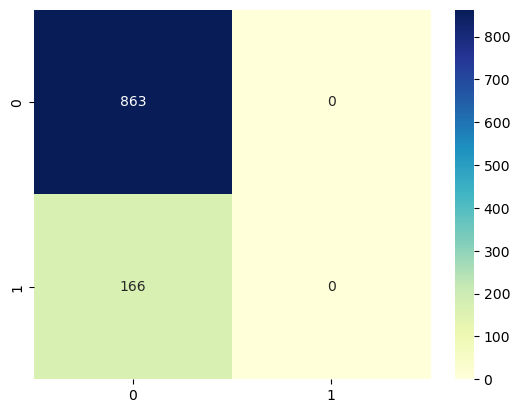

In [87]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(pd.DataFrame(cm_train), annot=True, cmap="YlGnBu" ,fmt='g')
clsReportTrain = classification_report(y_train,y_pred_train)
clsReportTrain

In [38]:
## Accuracy of prediction on test data
y_pred_test = logreg1.predict(X_test)
print(y_pred_test,  len(y_test)) # if prob(0) is higher then class is 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 441


In [39]:
pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred_test, name='PredTest').reset_index(drop=True)], axis=1)
#compare 
(y_test.reset_index(drop=True) == pd.Series(y_pred_test, name='PredTest').reset_index(drop=True)).sum()

370

'              precision    recall  f1-score   support\n\n           0       0.84      1.00      0.91       370\n           1       0.00      0.00      0.00        71\n\n    accuracy                           0.84       441\n   macro avg       0.42      0.50      0.46       441\nweighted avg       0.70      0.84      0.77       441\n'

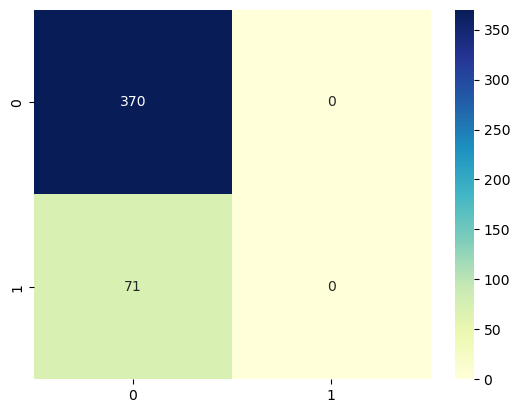

In [40]:
cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(pd.DataFrame(cm_test), annot=True, cmap="YlGnBu" ,fmt='g')
clsReportTest = classification_report(y_test,y_pred_test)
clsReportTest

In [42]:
(370 + 0)/(371+71 + 0 + 0) 

0.8371040723981901

# Predict from new Data

In [149]:
df1.head(2)

,Attrition,Age,DistanceFromHome,Education,YearsAtCompany,JobSatisfaction
0,1,41,1,2,6,4
1,0,49,8,1,10,2


In [150]:
df1.describe()

,Attrition,Age,DistanceFromHome,Education,YearsAtCompany,JobSatisfaction
count,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,0.161,36.924,9.193,2.913,7.008,2.729
std,0.368,9.135,8.107,1.024,6.127,1.103
min,0.000,18.000,1.000,1.000,0.000,1.000
25%,0.000,30.000,2.000,2.000,3.000,2.000
50%,0.000,36.000,7.000,3.000,5.000,3.000
75%,0.000,43.000,14.000,4.000,9.000,4.000
max,1.000,60.000,29.000,5.000,40.000,4.000


In [158]:
df1[df1['Attrition'] == 1]

,Attrition,Age,DistanceFromHome,Education,YearsAtCompany,JobSatisfaction
0,1,41,1,2,6,4
2,1,37,2,2,0,3
14,1,28,24,3,4,3
21,1,36,9,4,5,1
24,1,34,6,1,4,1
...,...,...,...,...,...,...
1438,1,23,9,3,1,1
1442,1,29,1,4,2,4
1444,1,56,7,2,10,3
1452,1,50,1,4,6,3


In [53]:
newData2 = pd.DataFrame({'Age':[30,50,43, 38, 49, 25, 50], 'DistanceFromHome':[5,6,20,7,17,108,29], 'Education':[1,2,4,3,2,3,8], 'YearsAtCompany':[5,8,5,10,7,5,13], \
                         'JobSatisfaction':[1,2,4,3,2,3,1]})
newData2

,Age,DistanceFromHome,Education,YearsAtCompany,JobSatisfaction
0,30,5,1,5,1
1,50,6,2,8,2
2,43,20,4,5,4
3,38,7,3,10,3
4,49,17,2,7,2
5,25,108,3,5,3
6,50,29,8,13,1


In [54]:
logreg1.predict_proba(newData2)

array([[0.74159753, 0.25840247],
       [0.91109188, 0.08890812],
       [0.88504069, 0.11495931],
       [0.88473061, 0.11526939],
       [0.88001301, 0.11998699],
       [0.25551394, 0.74448606],
       [0.85825032, 0.14174968]])

In [55]:
logreg1.predict(newData2)
#will the above employees leave or not  : No with the current model

array([0, 0, 0, 0, 0, 1, 0])

In [101]:
print(dir(logreg1))  #functions available

['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_metadata_routing', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_feature

In [103]:
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score

In [105]:
print('Log loss = {:.5f}'.format(log_loss(y_test, y_pred_test)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_pred_test)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, y_pred_test)))

Log loss = 5.80295
AUC = 0.50000
Average Precision = 0.16100


In [107]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

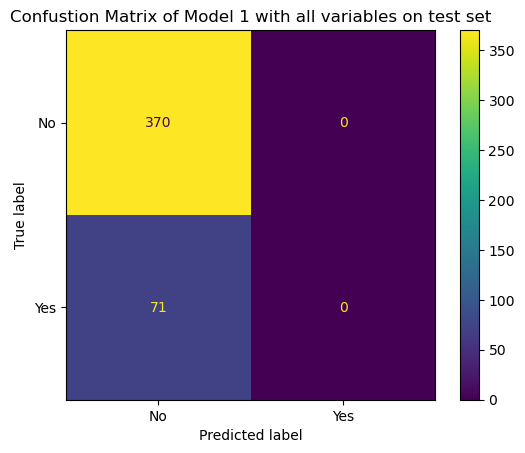

In [108]:
disp_cm  = ConfusionMatrixDisplay(cm_test, display_labels = ['No','Yes'])
disp_cm.plot()
plt.title('Confustion Matrix of Model 1 with all variables on test set')
plt.show()

In [64]:
#try this exercise 
# https://heds.nz/posts/logistic-regression-python/
# https://www.justintodata.com/logistic-regression-example-in-python/

### end here